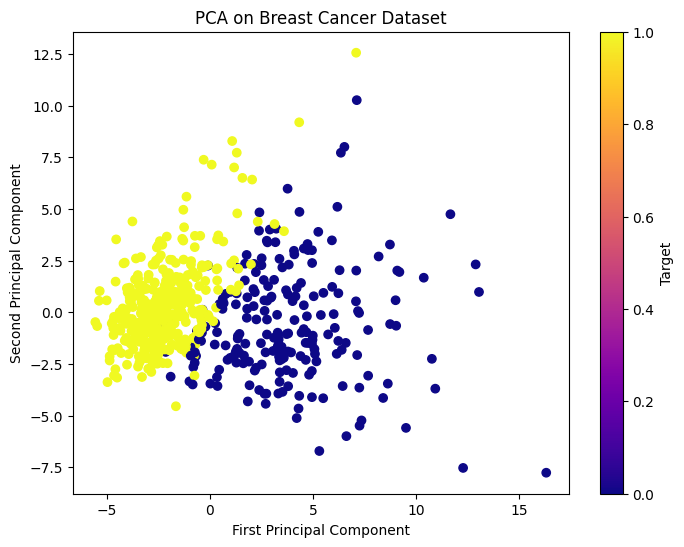

Confusion Matrix: 
 [[ 54   9]
 [  1 107]]
Accuracy:  94.15204678362574
Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92        63
           1       0.92      0.99      0.96       108

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171



<Figure size 800x600 with 0 Axes>

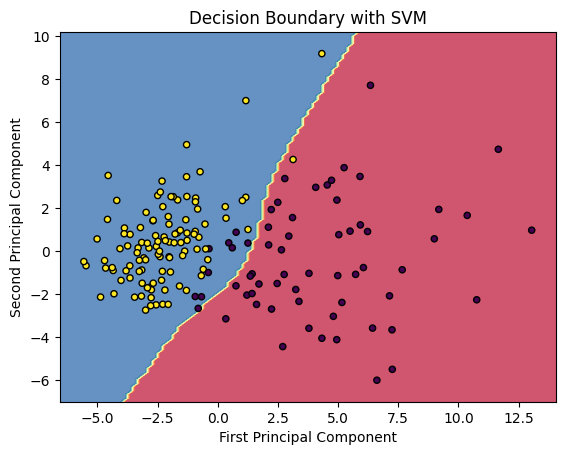

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the breast cancer dataset
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Input features
X = df[cancer['feature_names']]
# Target values
y = df['target']

# Standardize the features
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

# Apply PCA
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create a DataFrame for the PCA-transformed data
df_pca1 = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca1['target'] = y

# Optionally, to better visualize the results:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.show()

# Build the model
# rbf radial basis function
svm = SVC(kernel="poly", gamma=0.5, C=1.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca1[['PC1', 'PC2']], y, test_size=0.3, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict the model
y_pred = svm.predict(X_test)

# Function to calculate accuracy and print results
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: \n", classification_report(y_test, y_pred))

# Calculate and print accuracy
cal_accuracy(y_test, y_pred)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_test,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8
)

# Scatter plot
plt.scatter(X_test['PC1'], X_test['PC2'],
            c=y_test,
            s=20, edgecolors="k")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary with SVM')
plt.show()
